<a href="https://colab.research.google.com/github/BasmallahM/Prediction-of-Product-Sales/blob/main/Project_1_Part_4_(Core)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fpath = '/content/drive/MyDrive/sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Item_Weight

## Univariate Visualization

In [ ]:
# Assuming df is your DataFrame
# Replace placeholder values (e.g., 'NA', 0, '') with np.nan for proper null analysis
df['Item_Weight'].replace(0, pd.NA, inplace=True)



<ipython-input-18-1970932487>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].replace(0, pd.NA, inplace=True)


## Feature Analysis

In [ ]:
# How many null values? What percentage?
null_count = df['Item_Weight'].isnull().sum()
null_percent = (null_count / len(df)) * 100
null_count, round(null_percent, 2)

# 3. What would you do with the null values?
# Impute using the mean or median. Since it's numeric and missingness seems random, this is a safe choice.

(np.int64(1463), np.float64(17.17))

In [ ]:
 # Is the feature constant or quasi-constant?
 df['Item_Weight'].nunique()

415

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric (Continuous)

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 1463 nulls
  - (~17%)
  - Impute using the mean or median. Since it's numeric and missingness seems random, this is a safe choice.

- Is the feature constant or quasi-constant?
 - 415 unique values → Not constant or quasi-constant.

- What is the cardinality? Is it high (>10)?
   - Yes, high cardinality (more than 10 unique values).

- Would we know this feature before the target is determined?
   - Yes — product weight is known before sales.

- Is there a business case/understanding reason to exclude based on our business case?
  - No — it may be useful. Product weight could relate to pricing, shipping cost, and sales.

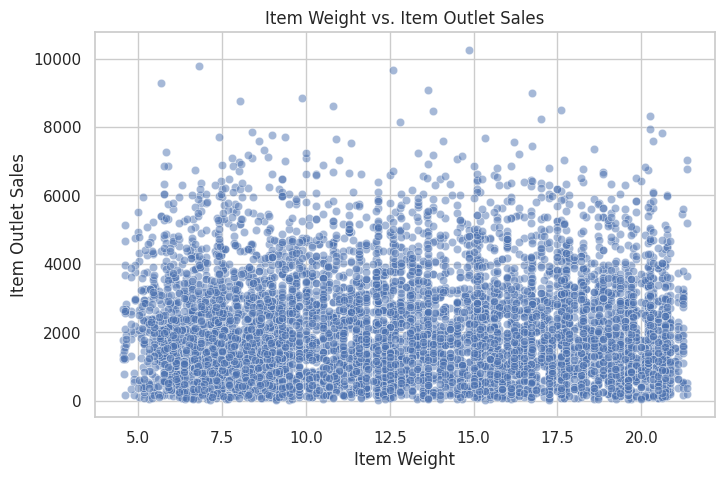

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df, alpha=0.5)
plt.title('Item Weight vs. Item Outlet Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
Possibly. Heavier items might be bulk products or more expensive, affecting sales.

2. Does this feature appear to be a predictor of the target?
Weak or no strong pattern visually. Might not be a strong individual predictor, but could be useful in combination with others.

## Multivariate Visualization: Item_Weight vs. Item_Outlet_Sales

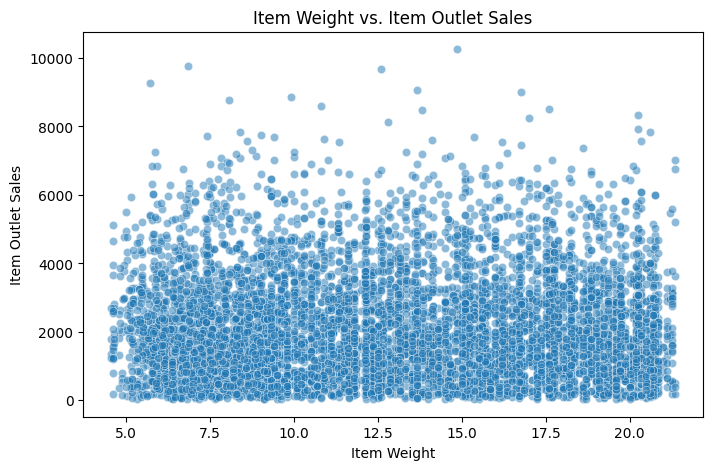

In [ ]:
# Multivariate Visualization: Item_Weight vs. Item_Outlet_Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df, alpha=0.5)
plt.title('Item Weight vs. Item Outlet Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()


# Item_Fat_Content

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

In [ ]:
# How many null values? What percentage?
null_count = df['Item_Fat_Content'].isnull().sum()
null_percent = (null_count / len(df)) * 100
null_count, round(null_percent, 2)


(np.int64(0), np.float64(0.0))

In [ ]:
 # Is the feature constant or quasi-constant?
 df['Item_Weight'].nunique()

415

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)
  
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nulls
  - 0 %
  -  **Handling Nulls:** If nulls exist, impute with mode.

3. Is the feature constant or quasi-constant?
  -.No, it varies significantly.

4. What is the cardinality? Is it high?
  - Low (typically 3-5 unique values after cleaning).

5. Would we know this BEFORE the target is determined?
  - Yes, available before sales.


6. Is there a business case/understanding reason to exclude based on our business case?
  - No

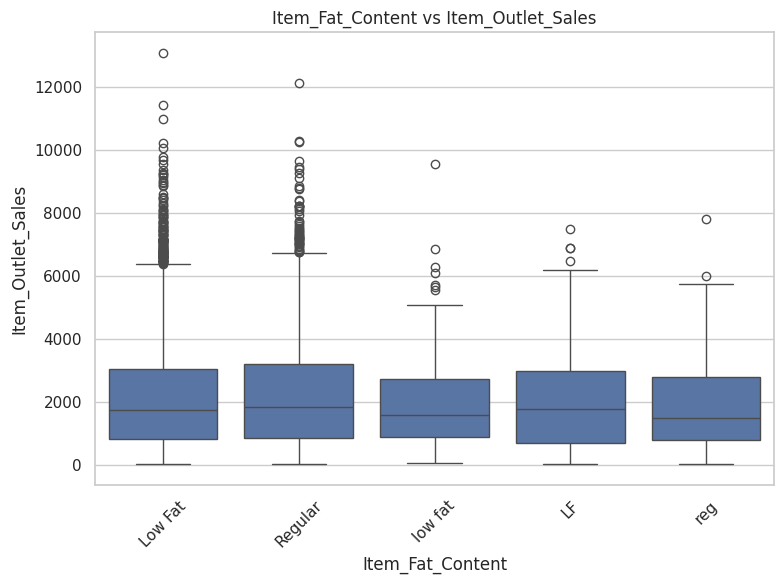

In [ ]:
#  Item_Fat_Content vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.title('Item_Fat_Content vs Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Business Expectation:** Yes, fat content could affect customer preference and sales.  
**Actual Predictor?:** Might be weak — often no significant difference in sales based on fat content alone.

# Item_Visibility

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

In [ ]:
# How many null values? What percentage?
null_count = df['Item_Visibility'].isnull().sum()
null_percent = (null_count / len(df)) * 100
null_count, round(null_percent, 2)

(np.int64(0), np.float64(0.0))

In [ ]:
 # Is the feature constant or quasi-constant?
 df['Item_Visibility'].nunique()

7880

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric (continuous)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0
  - 0 %
  - - Zeros may be invalid, treat as missing.
- **Handle Nulls/Zeros:** Impute zeros with mean or median visibility
3. Is the feature constant or quasi-constant?
  -.No.

4. What is the cardinality? Is it high?
  -High (many unique values).

5. Would we know this BEFORE the target is determined?
  -Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  -No.

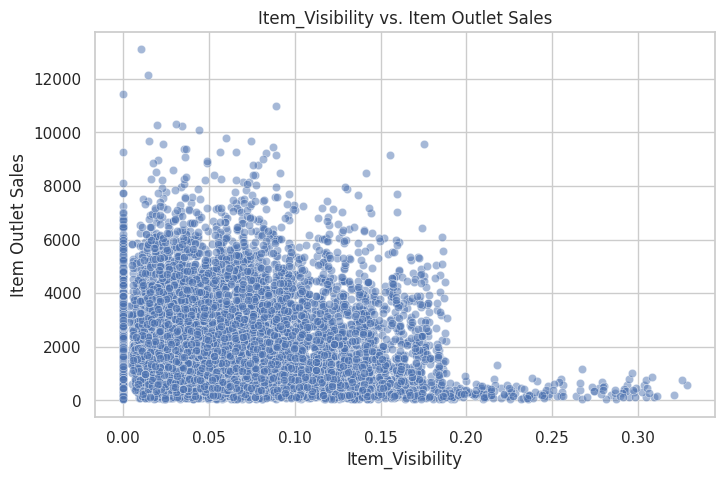

In [ ]:
# Multivariate Visualization: Item_Visibility vs. Item_Outlet_Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, alpha=0.5)
plt.title('Item_Visibility vs. Item Outlet Sales')
plt.xlabel('Item_Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

**Business Expectation:** Higher visibility → higher sales.  
**Actual Predictor?:** Often yes, though with diminishing returns.


# Item_Type

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

In [ ]:
# How many null values? What percentage?
null_count = df['Item_Type'].isnull().sum()
null_percent = (null_count / len(df)) * 100
null_count, round(null_percent, 2)

(np.int64(0), np.float64(0.0))

In [ ]:
 # Is the feature constant or quasi-constant?
 df['Item_Type'].nunique()

16

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nulls
  - **Handle Nulls:** Impute the nulls with mode if needed.

3. Is the feature constant or quasi-constant?
  -.No.

4. What is the cardinality? Is it high?
  -Medium
5. Would we know this BEFORE the target is determined?
  -Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  -No.

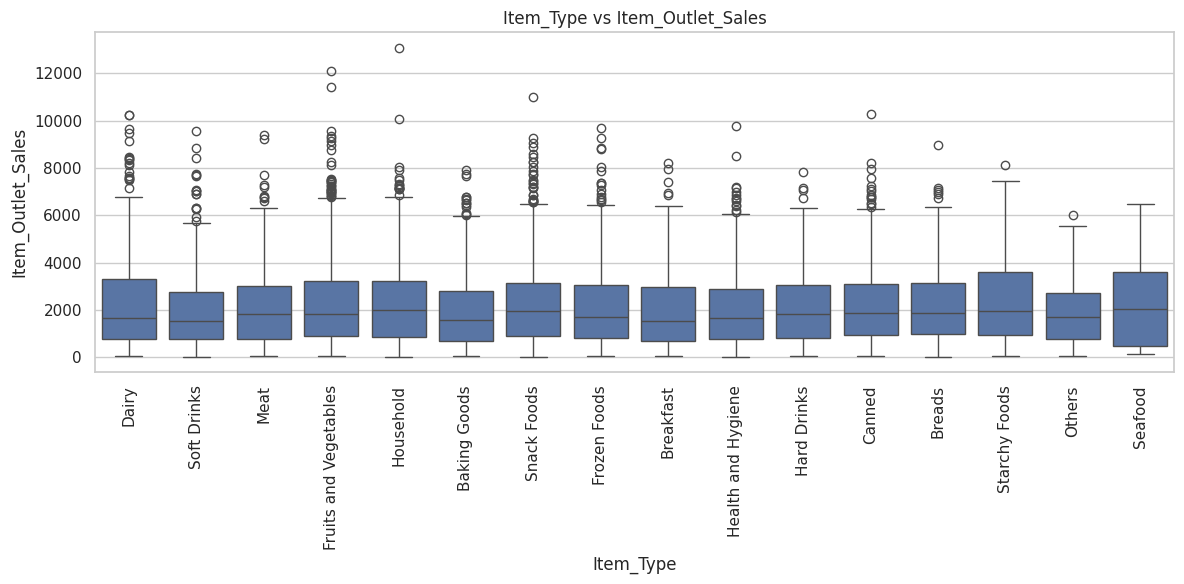

In [ ]:
#Item_Type vs Item_Outlet_Sales

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
plt.title('Item_Type vs Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Business Expectation:** Yes, item type likely influences sales.  
**Actual Predictor?:** Yes, strong indicator.

# Item_MRP

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

In [ ]:
# How many null values? What percentage?
null_count = df['Item_MRP'].isnull().sum()
null_percent = (null_count / len(df)) * 100
null_count, round(null_percent, 2)

(np.int64(0), np.float64(0.0))

In [ ]:
 # Is the feature constant or quasi-constant?
 df['Item_MRP'].nunique()

5938

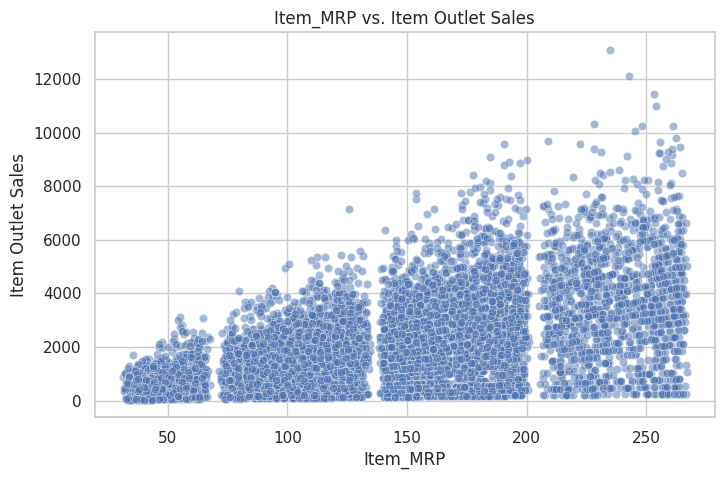

In [ ]:
# Multivariate Visualization: Item_MRP vs. Item_Outlet_Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, alpha=0.5)
plt.title('Item_MRP vs. Item Outlet Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

**Business Expectation:** Strong predictor — pricing affects demand.  
**Actual Predictor?:** Yes, one of the strongest predictors.


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -Numeric (continuous)
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nulls
  - **Handle Nulls:** N/A.

3. Is the feature constant or quasi-constant?
  -.No.

4. What is the cardinality? Is it high?
  -High
5. Would we know this BEFORE the target is determined?
  -Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  -No

# Outlet_Identifier

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

In [ ]:
# How many null values? What percentage?
null_count = df['Outlet_Identifier'].isnull().sum()
null_percent = (null_count / len(df)) * 100
null_count, round(null_percent, 2)

(np.int64(0), np.float64(0.0))

In [ ]:
 # Is the feature constant or quasi-constant?
 df['Outlet_Identifier'].nunique()

10

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -None.
  - **Handle Nulls:** N/A

3. Is the feature constant or quasi-constant?
  -.No

4. What is the cardinality? Is it high?
  - Low
5. Would we know this BEFORE the target is determined?
  -Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  -Possibly yes — if it’s just an ID with no meaning.

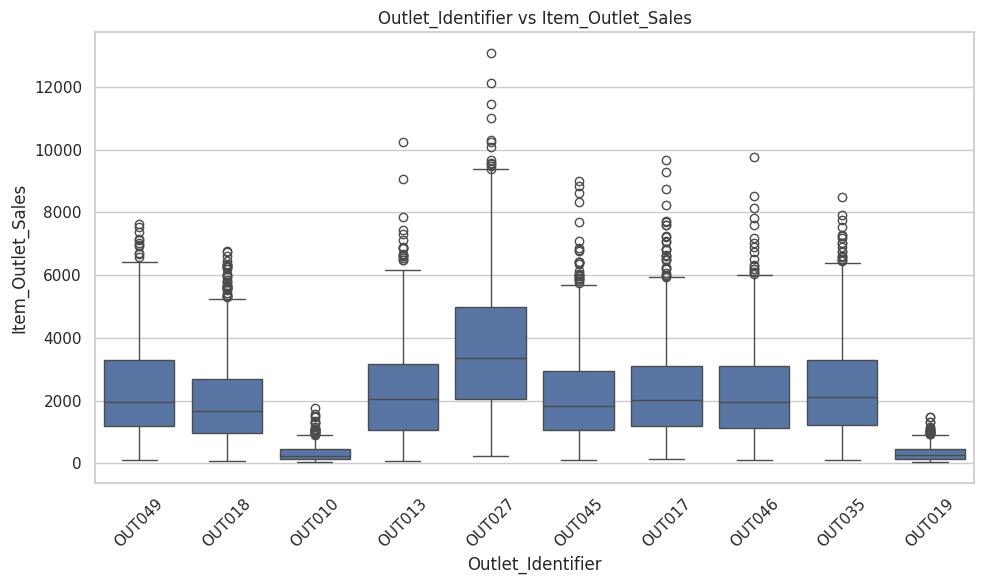

In [ ]:
# Outlet_Identifier vs Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Outlet_Identifier vs Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Business Expectation:** Not directly predictive — proxy for outlet-level effects.  
**Actual Predictor?:** Sometimes useful due to latent outlet effects.

# Outlet_Establishment_Year

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

In [ ]:
# How many null values? What percentage?
null_count = df['Outlet_Establishment_Year'].isnull().sum()
null_percent = (null_count / len(df)) * 100
null_count, round(null_percent, 2)

(np.int64(0), np.float64(0.0))

In [ ]:
 # Is the feature constant or quasi-constant?
 df['Outlet_Establishment_Year'].nunique()

9

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -Numeric (ordinal)
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -None
  - **Handle Nulls:** N/A.

3. Is the feature constant or quasi-constant?
  -.No

4. What is the cardinality? Is it high?
  -Low (typically <10).
5. Would we know this BEFORE the target is determined?
  -Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  -No

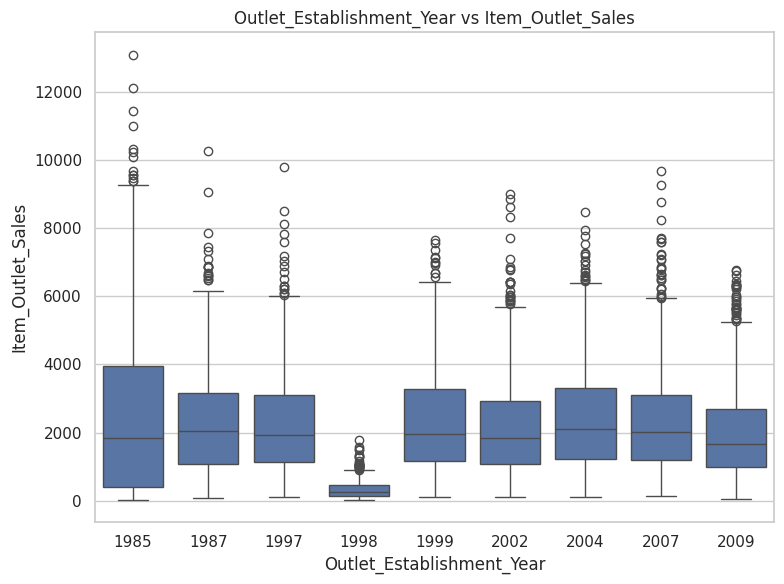

In [ ]:
# Outlet_Establishment_Year vs Item_Outlet_Sales

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
plt.title('Outlet_Establishment_Year vs Item_Outlet_Sales')
plt.tight_layout()
plt.show()

**Business Expectation:** Older outlets might have loyal customers.  
**Actual Predictor?:** Weak to moderate.


#  Outlet_Size

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

In [ ]:
# How many null values? What percentage?
null_count = df['Outlet_Size'].isnull().sum()
null_percent = (null_count / len(df)) * 100
null_count, round(null_percent, 2)

(np.int64(2410), np.float64(28.28))

In [ ]:
 # Is the feature constant or quasi-constant?
 df['Outlet_Size'].nunique()

3

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -Categorical (ordinal)
  
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -Some (~28% in original dataset).
  - **Handle Nulls:** Impute based on mode per outlet type or location

3. Is the feature constant or quasi-constant?
  -.No

4. What is the cardinality? Is it high?
  -Low (3).
5. Would we know this BEFORE the target is determined?
  -Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  -No

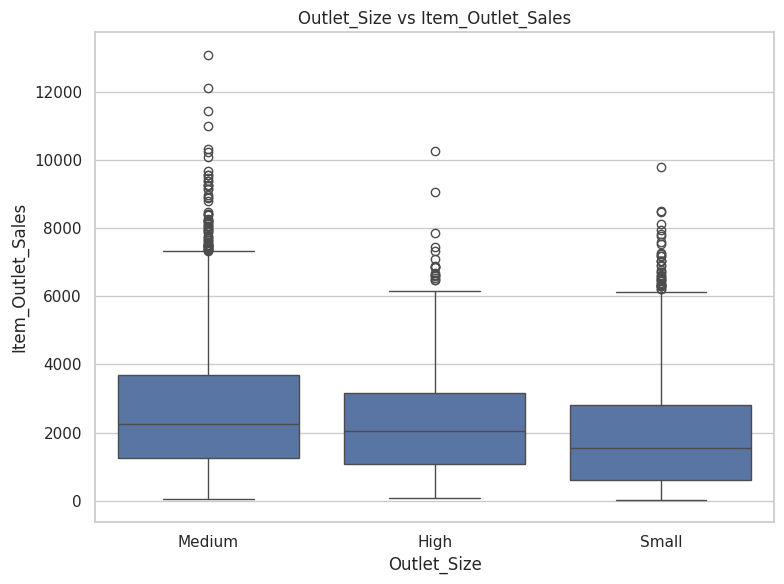

In [ ]:
# Outlet_Size vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Outlet_Size vs Item_Outlet_Sales')
plt.tight_layout()
plt.show()

**Business Expectation:** Yes, size may reflect capacity and customer base.  
**Actual Predictor?:** Moderately useful.


# Outlet_Location_Type

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

In [ ]:
# How many null values? What percentage?
null_count = df['Outlet_Location_Type'].isnull().sum()
null_percent = (null_count / len(df)) * 100
null_count, round(null_percent, 2)

(np.int64(0), np.float64(0.0))

In [ ]:
 # Is the feature constant or quasi-constant?
 df['Outlet_Location_Type'].nunique()

3

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -Categorical (ordinal )
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -None
  - **Handle Nulls:** N/A.


3. Is the feature constant or quasi-constant?
  -.No

4. What is the cardinality? Is it high?
  -Low
5. Would we know this BEFORE the target is determined?
  -Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  -No

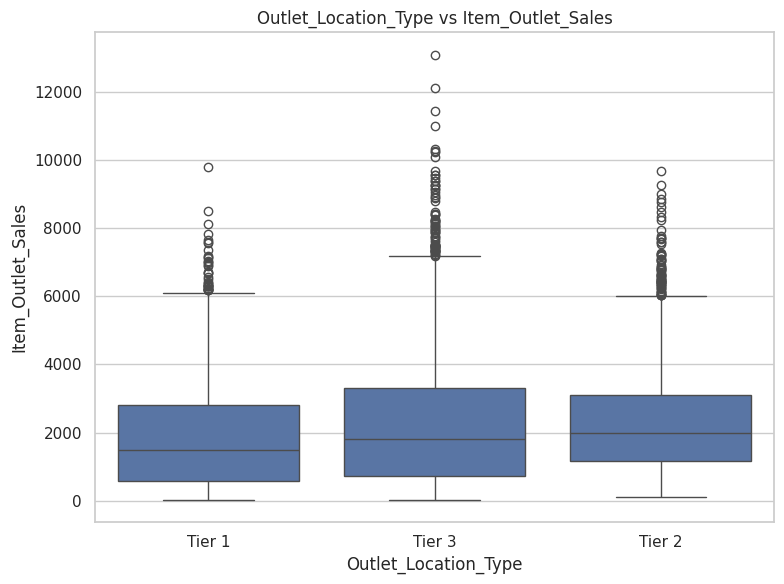

In [ ]:
# Outlet_Location_Type vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Outlet_Location_Type vs Item_Outlet_Sales')
plt.tight_layout()
plt.show()

**Business Expectation:** Yes — location affects footfall.  
**Actual Predictor?:** Moderate predictor.

# Outlet_Type

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

In [ ]:
# How many null values? What percentage?
null_count = df['Outlet_Type'].isnull().sum()
null_percent = (null_count / len(df)) * 100
null_count, round(null_percent, 2)

(np.int64(0), np.float64(0.0))

In [ ]:
 # Is the feature constant or quasi-constant?
 df['Outlet_Type'].nunique()

4

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -Categorical (nominal)
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - None
  - **Handle Nulls:** N/A.

3. Is the feature constant or quasi-constant?
  -.No

4. What is the cardinality? Is it high?
  -Low (4).
5. Would we know this BEFORE the target is determined?
  -Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  -No

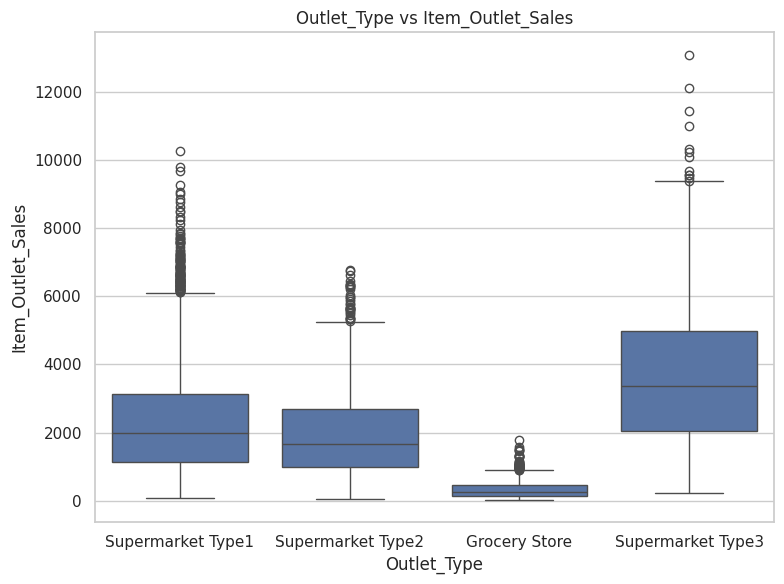

In [ ]:
# Outlet_Type vs Item_Outlet_Sales

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Outlet_Type vs Item_Outlet_Sales')
plt.tight_layout()
plt.show()


**Business Expectation:** Yes — outlet type determines customer base and pricing.  
**Actual Predictor?:** Strong predictor.

# Item_Outlet_Sales (TARGET)

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df[feature].dtype

dtype('float64')

In [ ]:
# How many null values? What percentage?
null_count = df['Item_Outlet_Sales'].isnull().sum()
null_percent = (null_count / len(df)) * 100
null_count, round(null_percent, 2)

(np.int64(0), np.float64(0.0))

In [ ]:
 # Is the feature constant or quasi-constant?
 df['Item_Outlet_Sales'].nunique()

3493

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -

3. Is the feature constant or quasi-constant?
  -.

4. What is the cardinality? Is it high?
  -
5. Would we know this BEFORE the target is determined?
  -

6. Is there a business case/understanding reason to exclude based on our business case?
  -

<ipython-input-5-2480518175>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-5-2480518175>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-5-2480518175>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-5-2480518175>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-5-2480518175>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tick

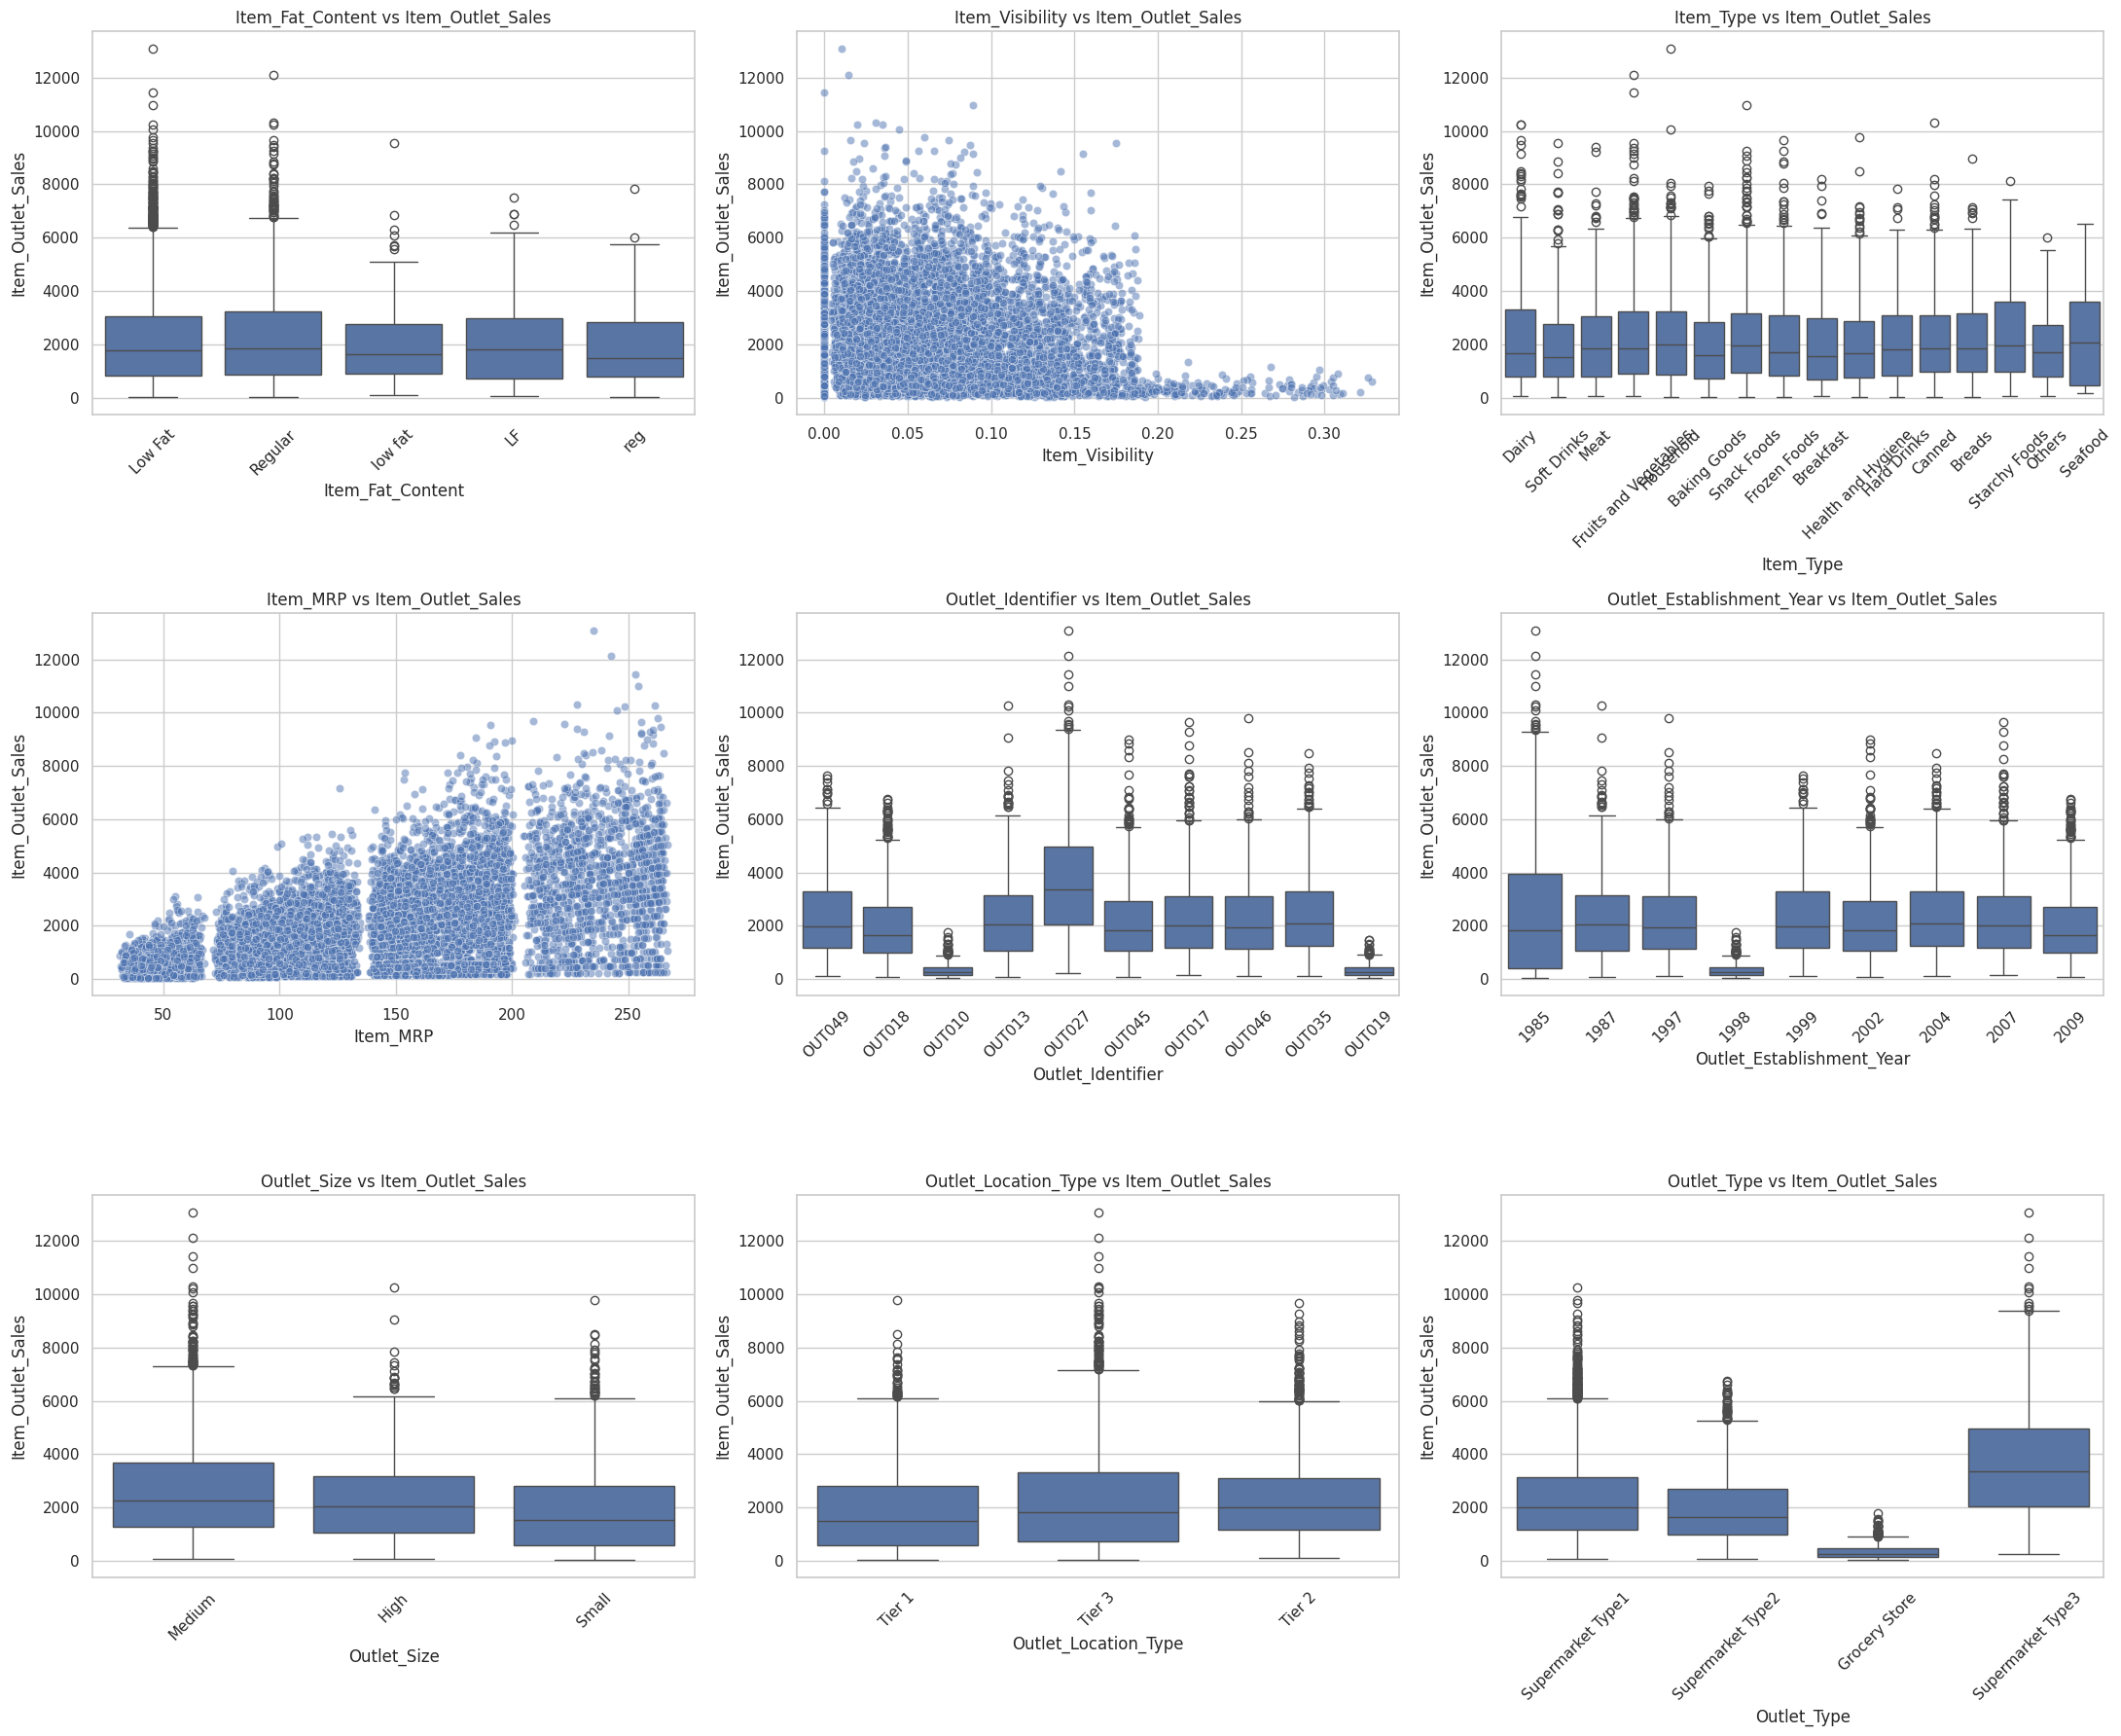

In [ ]:
# Ensure visual style
sns.set(style="whitegrid")

# Define target and features
target = 'Item_Outlet_Sales'
features = [
    'Item_Fat_Content',
    'Item_Visibility',
    'Item_Type',
    'Item_MRP',
    'Outlet_Identifier',
    'Outlet_Establishment_Year',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type'
]

# Set up subplot grid
fig, axs = plt.subplots(3, 3, figsize=(22, 18))
axs = axs.flatten()

# Loop through features to plot
for i, feature in enumerate(features):
    ax = axs[i]
    if df[feature].dtype == 'object' or df[feature].nunique() < 10:
        # Boxplot for categorical features or low-cardinality numeric
        sns.boxplot(data=df, x=feature, y=target, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        # Scatter plot for continuous features
        sns.scatterplot(data=df, x=feature, y=target, ax=ax, alpha=0.5)
    ax.set_title(f'{feature} vs {target}')

# Remove any extra axes
for j in range(len(features), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()
